In [1]:
#Chih-Yu Hsu mail to: tccnchsu@gmail.com
#http://tccnchsu.blogspot.tw/
# http://www.scipy-lectures.org/advanced/image_processing/
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import NoNorm
import pylab
from scipy import misc
import numpy as np

In [2]:
#http://scikit-image.org/docs/dev/user_guide/transforming_image_data.html
#im_image = np.uint8(100*np.ones((28, 28)))
#im_image =100.*np.ones((28,28), dtype=np.float32)

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False]
 [False False False False False False False False False False False False
  False False False False False False False False F

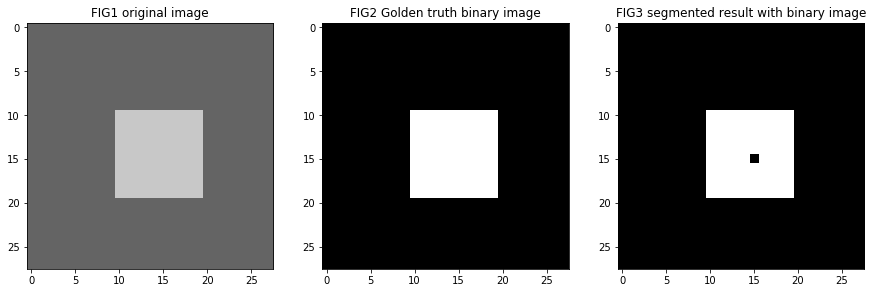

In [71]:
im_image =100*np.ones((28,28), dtype=np.uint8)
im_image[10:20, 10:20] = 200
plt.figure(num=0,figsize=(15,15))
plt.subplot(131)
#plt.gray()
#plt.imshow(im_image , cmap='gray', norm=NoNorm())
plt.title('FIG1 original image')
plt.imshow(im_image , cmap=plt.cm.gray , norm=NoNorm())
#plt.imshow(im_image , cmap=plt.cm.gray, norm=NoNorm())
#plt.show()
# Store data to disk
#plt.imsave('C:/pythonwork/images/Pimage1.png', im_image) # uses the Image module (PIL)
#convert image (np.array) to binary image
#https://stackoverflow.com/questions/40449781/convert-image-np-array-to-binary-image
im_truth_label=im_image>120  
plt.subplot(132)
plt.imshow(im_truth_label , cmap=plt.cm.gray)
plt.title('FIG2 Golden truth binary image')
im_segmented_label=im_image>120
print(im_segmented_label)
print(im_segmented_label.dtype)
im_segmented_label[15,15]=False
#im_label=np.zeros((28,28), dtype=bool)
#im_label[1:3, 1:3] =np.array([[True, True] , [True, True]])
plt.subplot(133)
plt.imshow(im_segmented_label, cmap=plt.cm.gray)
plt.title('FIG3 segmented result with binary image')
plt.show()
# Store data to disk
#plt.imsave('C:/pythonwork/labels/Plabel1.png', im_label) # uses the Image module (PIL)


[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]
[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True False  True  True  Tru

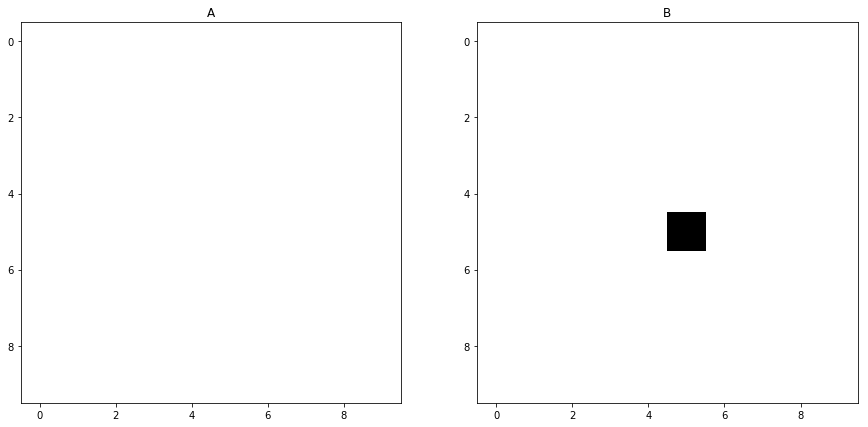

In [87]:
#dice similarity coefficient(index)
#https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient
# A is the white region in FIG2 and it is Region Of Interest (ROI)
# B is the white region in FIG3 and it is segmented result


plt.figure(num=1,figsize=(15,15))
plt.subplot(121)
A=im_truth_label[10:20,10:20]
print(A)
plt.imshow(A, cmap=plt.cm.binary)
plt.title('A')
plt.subplot(122)
B=im_segmented_label[10:20,10:20]
print(B)
plt.imshow(B, cmap=plt.cm.gray)
plt.title('B')
plt.show()

[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True False  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


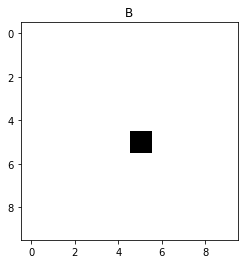

In [88]:
# C=A&&B
C=np.logical_and(A,B)
print(C)
plt.imshow(B, cmap=plt.cm.gray)
plt.title('B')
plt.show()

In [101]:
 NO_A_and_B=np.count_nonzero(C)
 print('|A&&B|='+ str(NO_A_and_B))

|A&&B|=99


In [100]:
ra,ca=A.shape
print(ra)
print(ca)
print('|A|='+ str(ra*ca))
rb,cb=B.shape
print(rb)
print(cb)
print('|B|='+ str(rb*cb))

10
10
|A|=100
10
10
|B|=100


In [115]:
DSC=2*NO_A_and_B/(ra*ca+rb*cb)
print('DSC'+str(DSC))

DSC0.99


In [137]:
lone = True
lzero=False
n1=int(bool(lone))
n0=int(bool(lzero))
LAV=[lzero,lzero,lzero,lone,lone,lzero]
LBV=[lzero,lzero,lzero,lzero,lone,lzero]
print(LAV)
print(LBV)
AV=np.array([n0,n0,n0,n1,n1,n0])
BV=np.array([n0,n0,n0,n0,n1,n0])
print(AV) #truth
print(BV) #segmented
A_and_B=np.logical_and(LAV,LBV)
print(A_and_B)
no_A_and_B=A_and_B.astype(int) 
print(no_A_and_B)

NO_A_and_B=np.count_nonzero(A_and_B)
print('|A&&B|='+ str(NO_A_and_B))
NOA=len(AV)
print('|A|='+ str(NOA))
NOB=len(BV)
print('|B|='+ str(NOB))
DSC=2*NO_A_and_B/(NOA+NOB)
print('DSC'+str(DSC))
1/6

[False, False, False, True, True, False]
[False, False, False, False, True, False]
[0 0 0 1 1 0]
[0 0 0 0 1 0]
[False False False False  True False]
[0 0 0 0 1 0]
|A&&B|=1
|A|=6
|B|=6
DSC0.16666666666666666


0.16666666666666666

In [124]:
# Store data to disk, and load it again:
#>>> np.save('/tmp/123', np.array([[1, 2, 3], [4, 5, 6]]))
#>>> np.load('/tmp/123.npy')
#array([[1, 2, 3],
#       [4, 5, 6]])

#arr = np.array(img) transform image to array
#arr = img.load() load array
#a=np.ones(10, dtype=bool)
#https://matplotlib.org/users/image_tutorial.html
#https://stackoverflow.com/questions/3823752/display-image-as-grayscale-using-matplotlib/11603881
